In [23]:
%matplotlib inline

import pandas as pd
import numpy as np

from modelclass import model
model.widescreen()

In [24]:
 %load_ext autoreload
 %autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Create a Samuleson multiplier accelerator model 

In [25]:
fma   = f'''
gdp = consumption+investment  
consumption = mul * gdp(-1)
investment = acc * (consumption-consumption(-1)) + exo_investment'''
mma = model.from_eq(fma,modelname = 'Accelerator multiplicator model')

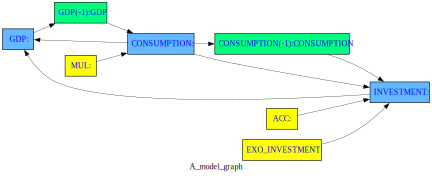

In [26]:
mma.drawmodel()

# A function which generates a dataframe with values

In [27]:
def get_df(mul=0.9,acc=0.5,gdp=1000,im=200,years=100):
    'Creates imput dataframe to accelerator multiplier model '
    df = pd.DataFrame([[gdp]]*years,index=range(2018,2018+years),columns=['GDP'])
    df.loc[:,'MUL']= mul
    df.loc[:,'ACC']= acc
    df.loc[:,'CONSUMPTION']= gdp*mul
    df.loc[:,'EXO_INVESTMENT']= im
    return df
base = get_df()
base.head()

,GDP,MUL,ACC,CONSUMPTION,EXO_INVESTMENT
2018,1000,0.9,0.5,900.0,200
2019,1000,0.9,0.5,900.0,200
2020,1000,0.9,0.5,900.0,200
2021,1000,0.9,0.5,900.0,200
2022,1000,0.9,0.5,900.0,200


# a function to forecast and calculate eigenvalues 

In [28]:
import matplotlib.pyplot as plt
plt.close('all')

def geteigen(mul,acc,years=30,show=False):
    from copy import copy 
    from modelnewton import newton_diff

    '''Function which creates a Samuelson Multiplier accelerator model, runs it and 
    calculates the eigenvalues for the compaignion matrix in order to evaluate stability'''
    
    first = get_df(mul,acc,years=years)
    base  = mma(first,silent=True)     # Solve the model 
    mma_newton = newton_diff(mma)      # create a newton_diff instance which contains derivatives 
    eig_dic = mma_newton.get_eigenvectors() # should be named get_eigenvalues
    
    display(mma_newton.eigplot(eig_dic))
    maxfeedback = '\n'.join([f'{per} {value:.2}' for per,value in mma_newton.get_feedback(eig_dic).items()])
    print(mma_newton.get_df_eigen_dict()[2019]) 
   # print(mma_newton.comp_dic[2019])  # compaignion matrix (probably should be 6 x6 )
    if show:
        _ = mma['gdp consumption investment'].plot(top=0.8,title='Values',colrow=3,sharey=False)  # Show the solution
        display(_)
    return  mma_newton

## Stability   

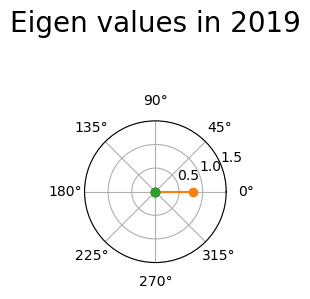

               0         1    2
Eigenvalues  0.0  0.800000  0.0
0            1.0  0.707107  0.0
1            0.0  0.707107  0.0
2            0.0  0.000000  1.0


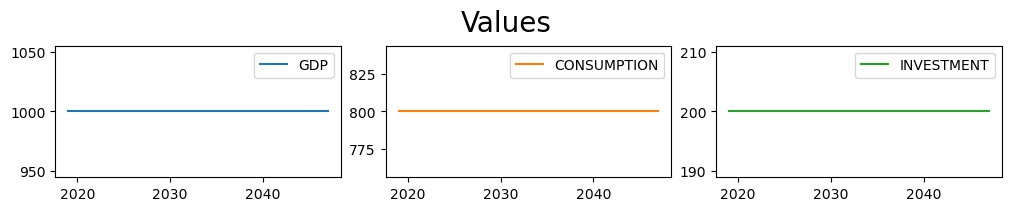

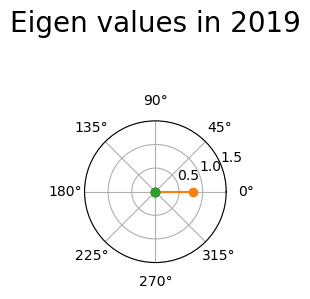

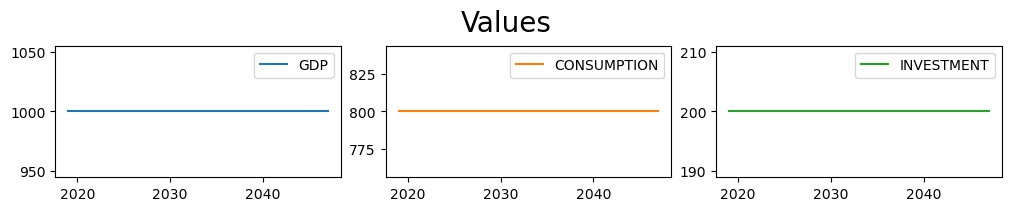

In [29]:
geteigen(mul=0.8,acc=0,show=1);

## Explosion 

In [ ]:
eig = geteigen(mul=0.9,acc=2,show=1);

## Exploding oscillations

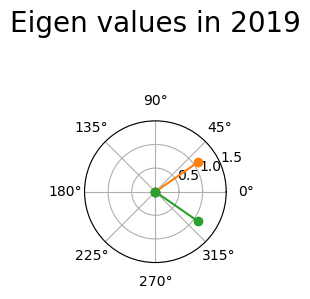

                    0                   1                   2
Eigenvalues  0.0+0.0j  0.900000+0.624500j  0.900000-0.624500j
0            0.0+0.0j  0.345134-0.239485j  0.345134+0.239485j
1            0.0+0.0j  0.766965+0.000000j  0.766965-0.000000j
2            1.0+0.0j  0.421831+0.239485j  0.421831-0.239485j


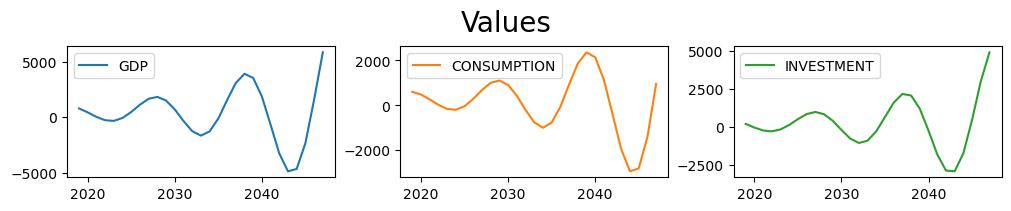

In [30]:
geteigen(mul=0.6,acc=2,show=1);

## Perpetual oscillations 

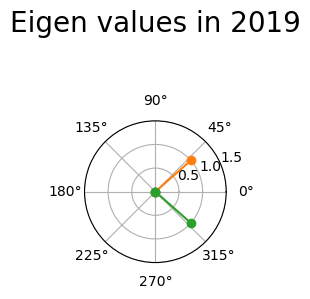

                    0                   1                   2
Eigenvalues  0.0+0.0j  0.750000+0.661438j  0.750000-0.661438j
0            0.0+0.0j  0.283473-0.250000j  0.283473+0.250000j
1            0.0+0.0j  0.755929+0.000000j  0.755929-0.000000j
2            1.0+0.0j  0.472456+0.250000j  0.472456-0.250000j


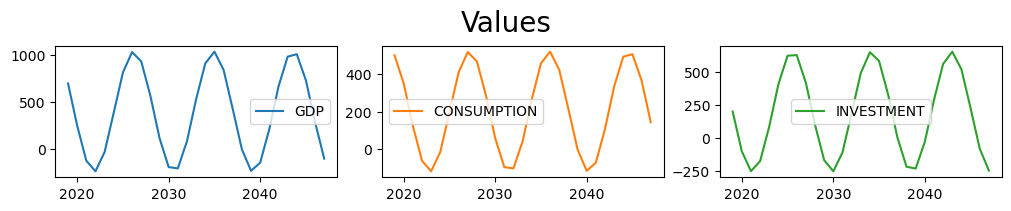

In [31]:
geteigen(mul=0.5,acc=2,show=1);

## Dampened oscillations 

In [32]:
geteigen(mul=0.7,acc=1,show=1);